This data set provides a comprehensive record of daily gold prices from January 19, 2014 to January 22, 2024. The data is provided by Nasdaq and includes key financial metrics for each trading day.

The dataset consists of the following columns:

Date: A unique date for each trading day recorded.
Close: The closing price of gold on the relevant date.
Volume: Gold trading volume on the relevant date.
Open: The opening price of gold on the relevant date.
High: The highest recorded price of gold during the trading day.
Low: The lowest price recorded for gold in the trading day.


This analysis provides various insights to explore trends and patterns in gold stocks over a period of time


In [2]:
import pandas as pd
# Load the dataset
data = pd.read_csv('goldstock.csv')

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display the number of rows and columns in the dataset
rows, columns = data.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 2511, Number of columns: 7


In [5]:
# Display the data types of each column
data.dtypes


Unnamed: 0      int64
Date           object
Close         float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

In [6]:
# Display summary statistics of the numerical columns
data.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [7]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the count of missing values in each column
missing_values


Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

# Distribution of the 'Close' prices

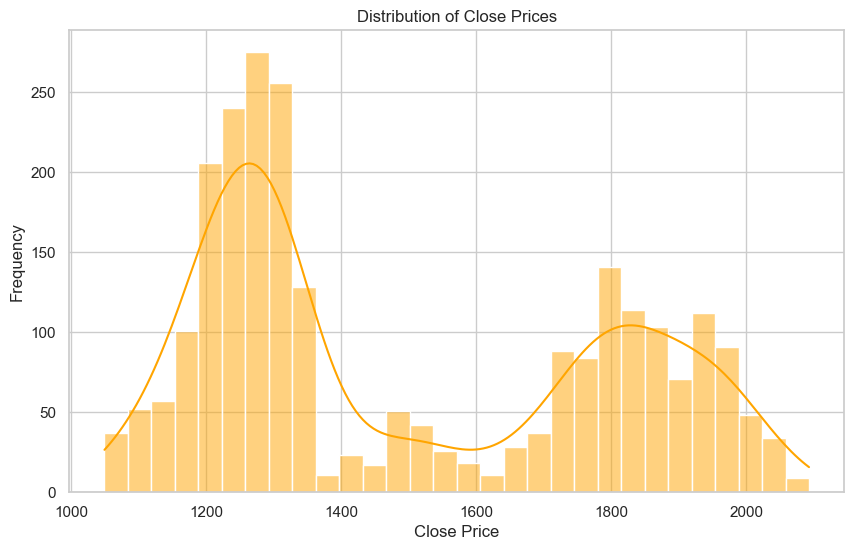

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='orange')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


# Average 'Close' price for each year

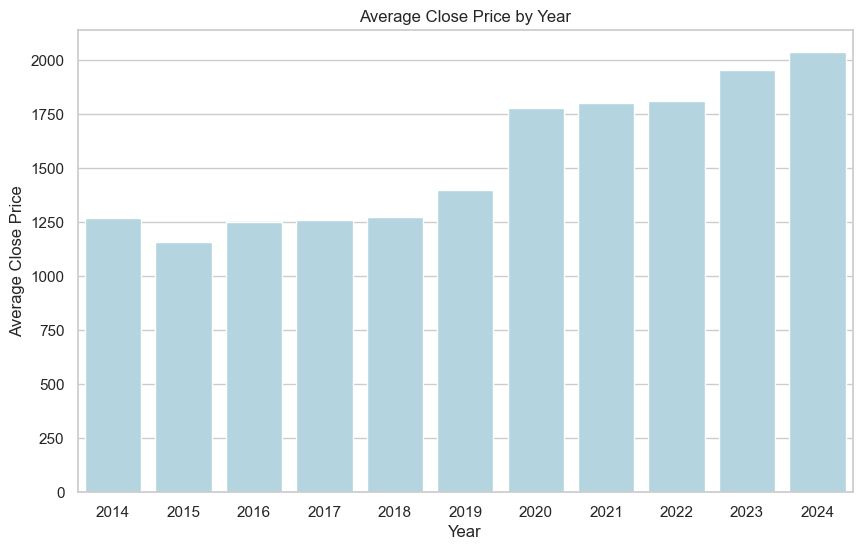

In [23]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extracting the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Calculating the average 'Close' price for each year
average_close_by_year = data.groupby('Year')['Close'].mean().reset_index()

# Plotting the bar plot for average 'Close' price by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Close', data=average_close_by_year, color='lightblue')
plt.title('Average Close Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

# Distribution of Open Prices Across Years

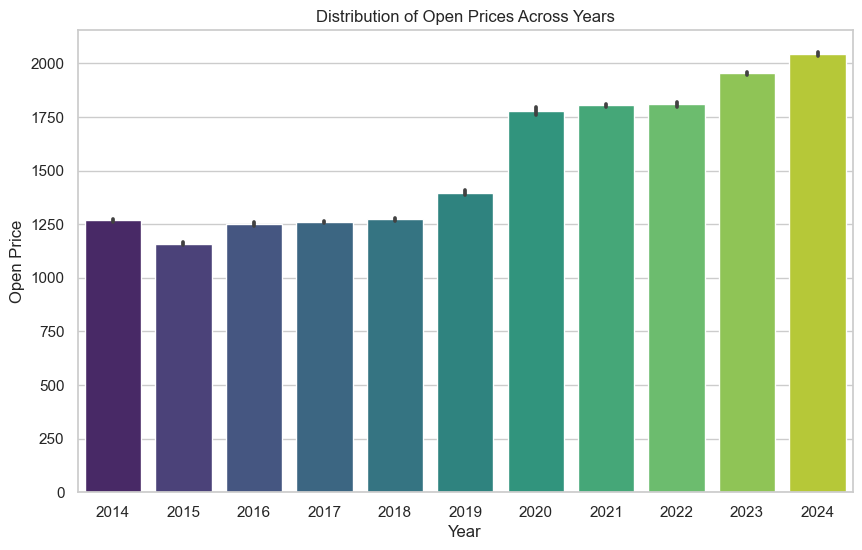

In [24]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extracting the month from the 'Date' column
data['Year'] = data['Date'].dt.year

# Plotting the bar plot for distribution of 'Open' prices across months
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Open', data=data, palette='viridis')
plt.title('Distribution of Open Prices Across Years')
plt.xlabel('Year')
plt.ylabel('Open Price')
plt.show()

# 'Open' prices compare to 'Close' prices on average

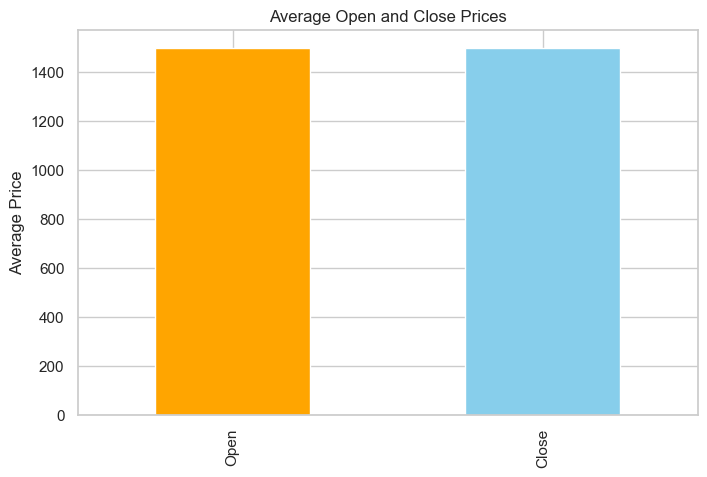

In [26]:
# Calculating the average 'Open' and 'Close' prices
average_prices = data[['Open', 'Close']].mean()

# Plotting the bar plot for average 'Open' and 'Close' prices
plt.figure(figsize=(8, 5))
average_prices.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Average Open and Close Prices')
plt.ylabel('Average Price')
plt.show()


# trading volume over time

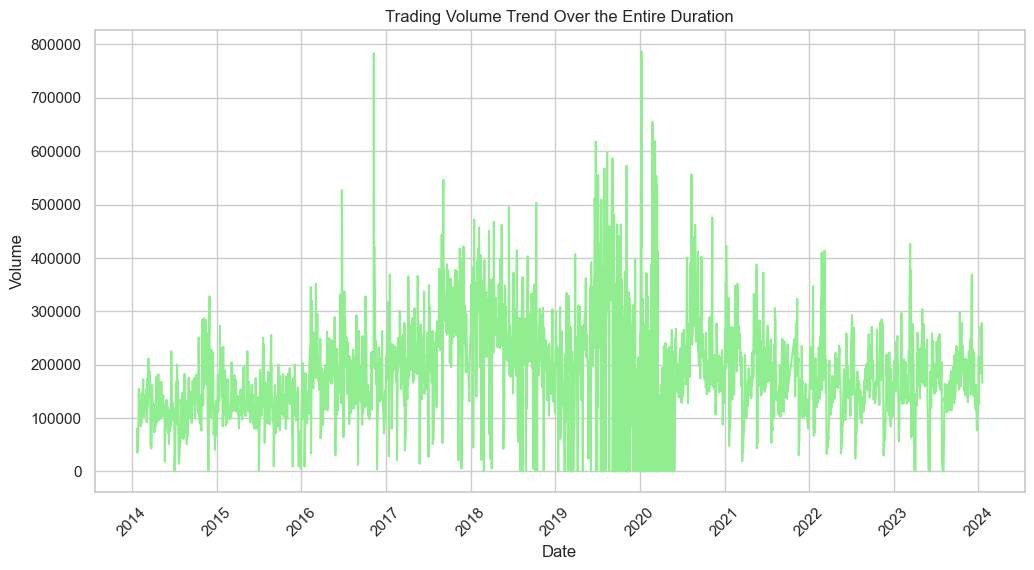

In [33]:
# Plotting the line plot for trading volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=data, color='lightgreen')
plt.title('Trading Volume Trend Over the Entire Duration')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()


# The trend in the 'High' and 'Low' prices over the entire duration

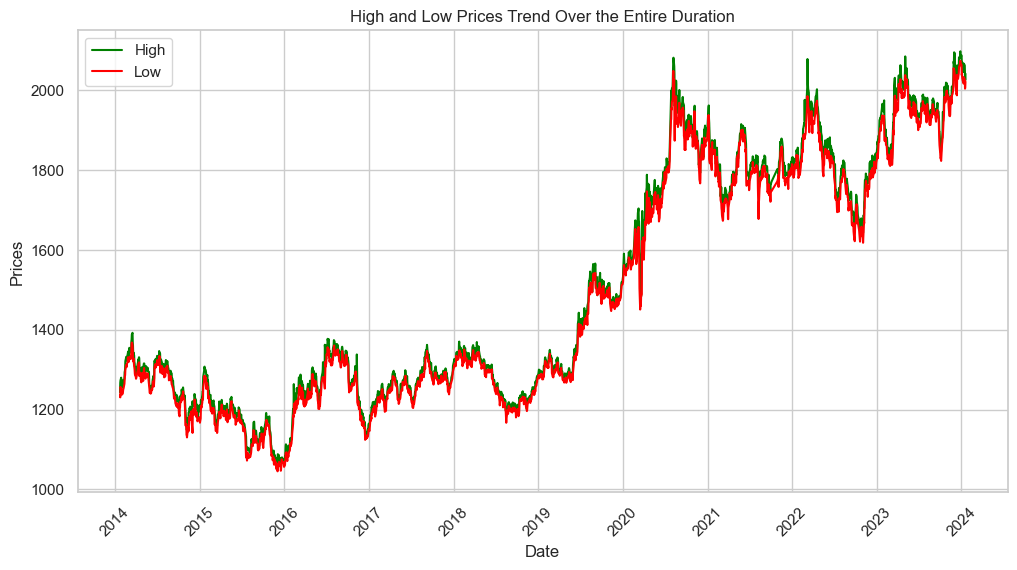

In [35]:
# Plotting the line plot for 'High' and 'Low' prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='High', data=data, label='High', color='green')
sns.lineplot(x='Date', y='Low', data=data, label='Low', color='red')
plt.title('High and Low Prices Trend Over the Entire Duration')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Variation in the difference between 'Open' and 'Close' prices over Months

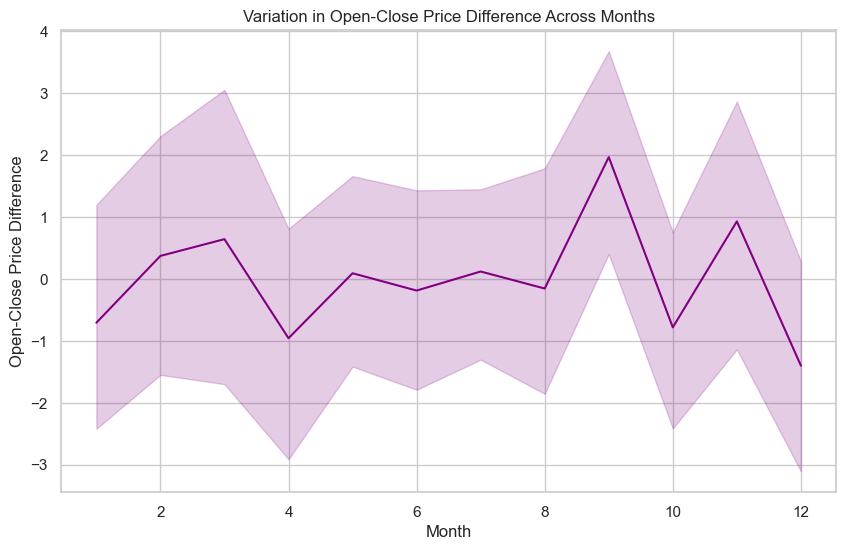

In [39]:
# Calculate the difference between 'Open' and 'Close' prices
data['Open_Close_Difference'] = data['Open'] - data['Close']

# Extracting the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Plotting the line plot for the difference between 'Open' and 'Close' prices over months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Open_Close_Difference', data=data, color='purple')
plt.title('Variation in Open-Close Price Difference Across Months')
plt.xlabel('Month')
plt.ylabel('Open-Close Price Difference')
plt.show()


# Correlation coefficient between 'High' and 'Low' prices?

In [40]:
from scipy.stats import pearsonr

# Calculating the correlation coefficient between 'High' and 'Low' prices
correlation_coefficient, _ = pearsonr(data['High'], data['Low'])
print(f"The correlation coefficient between 'High' and 'Low' prices: {correlation_coefficient:.4f}")

The correlation coefficient between 'High' and 'Low' prices: 0.9993


# 'Volume' in corelation with 'High' and 'Low' prices 

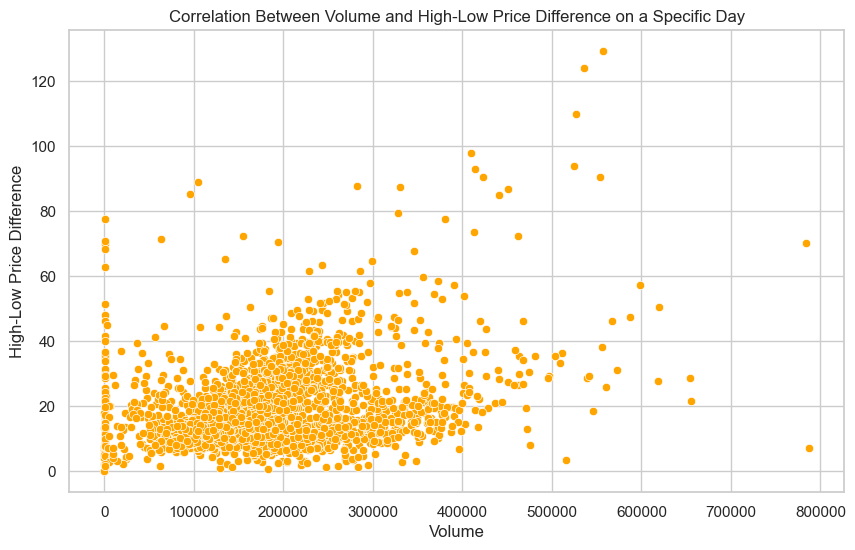

In [41]:
# Calculate the difference between 'High' and 'Low' prices
data['High_Low_Difference'] = data['High'] - data['Low']

# Plotting the scatterplot for 'Volume' vs the difference between 'High' and 'Low' prices on a specific day
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='High_Low_Difference', data=data, color='orange')
plt.title('Correlation Between Volume and High-Low Price Difference on a Specific Day')
plt.xlabel('Volume')
plt.ylabel('High-Low Price Difference')
plt.show()


# Heatmap of trading volume trends monthly

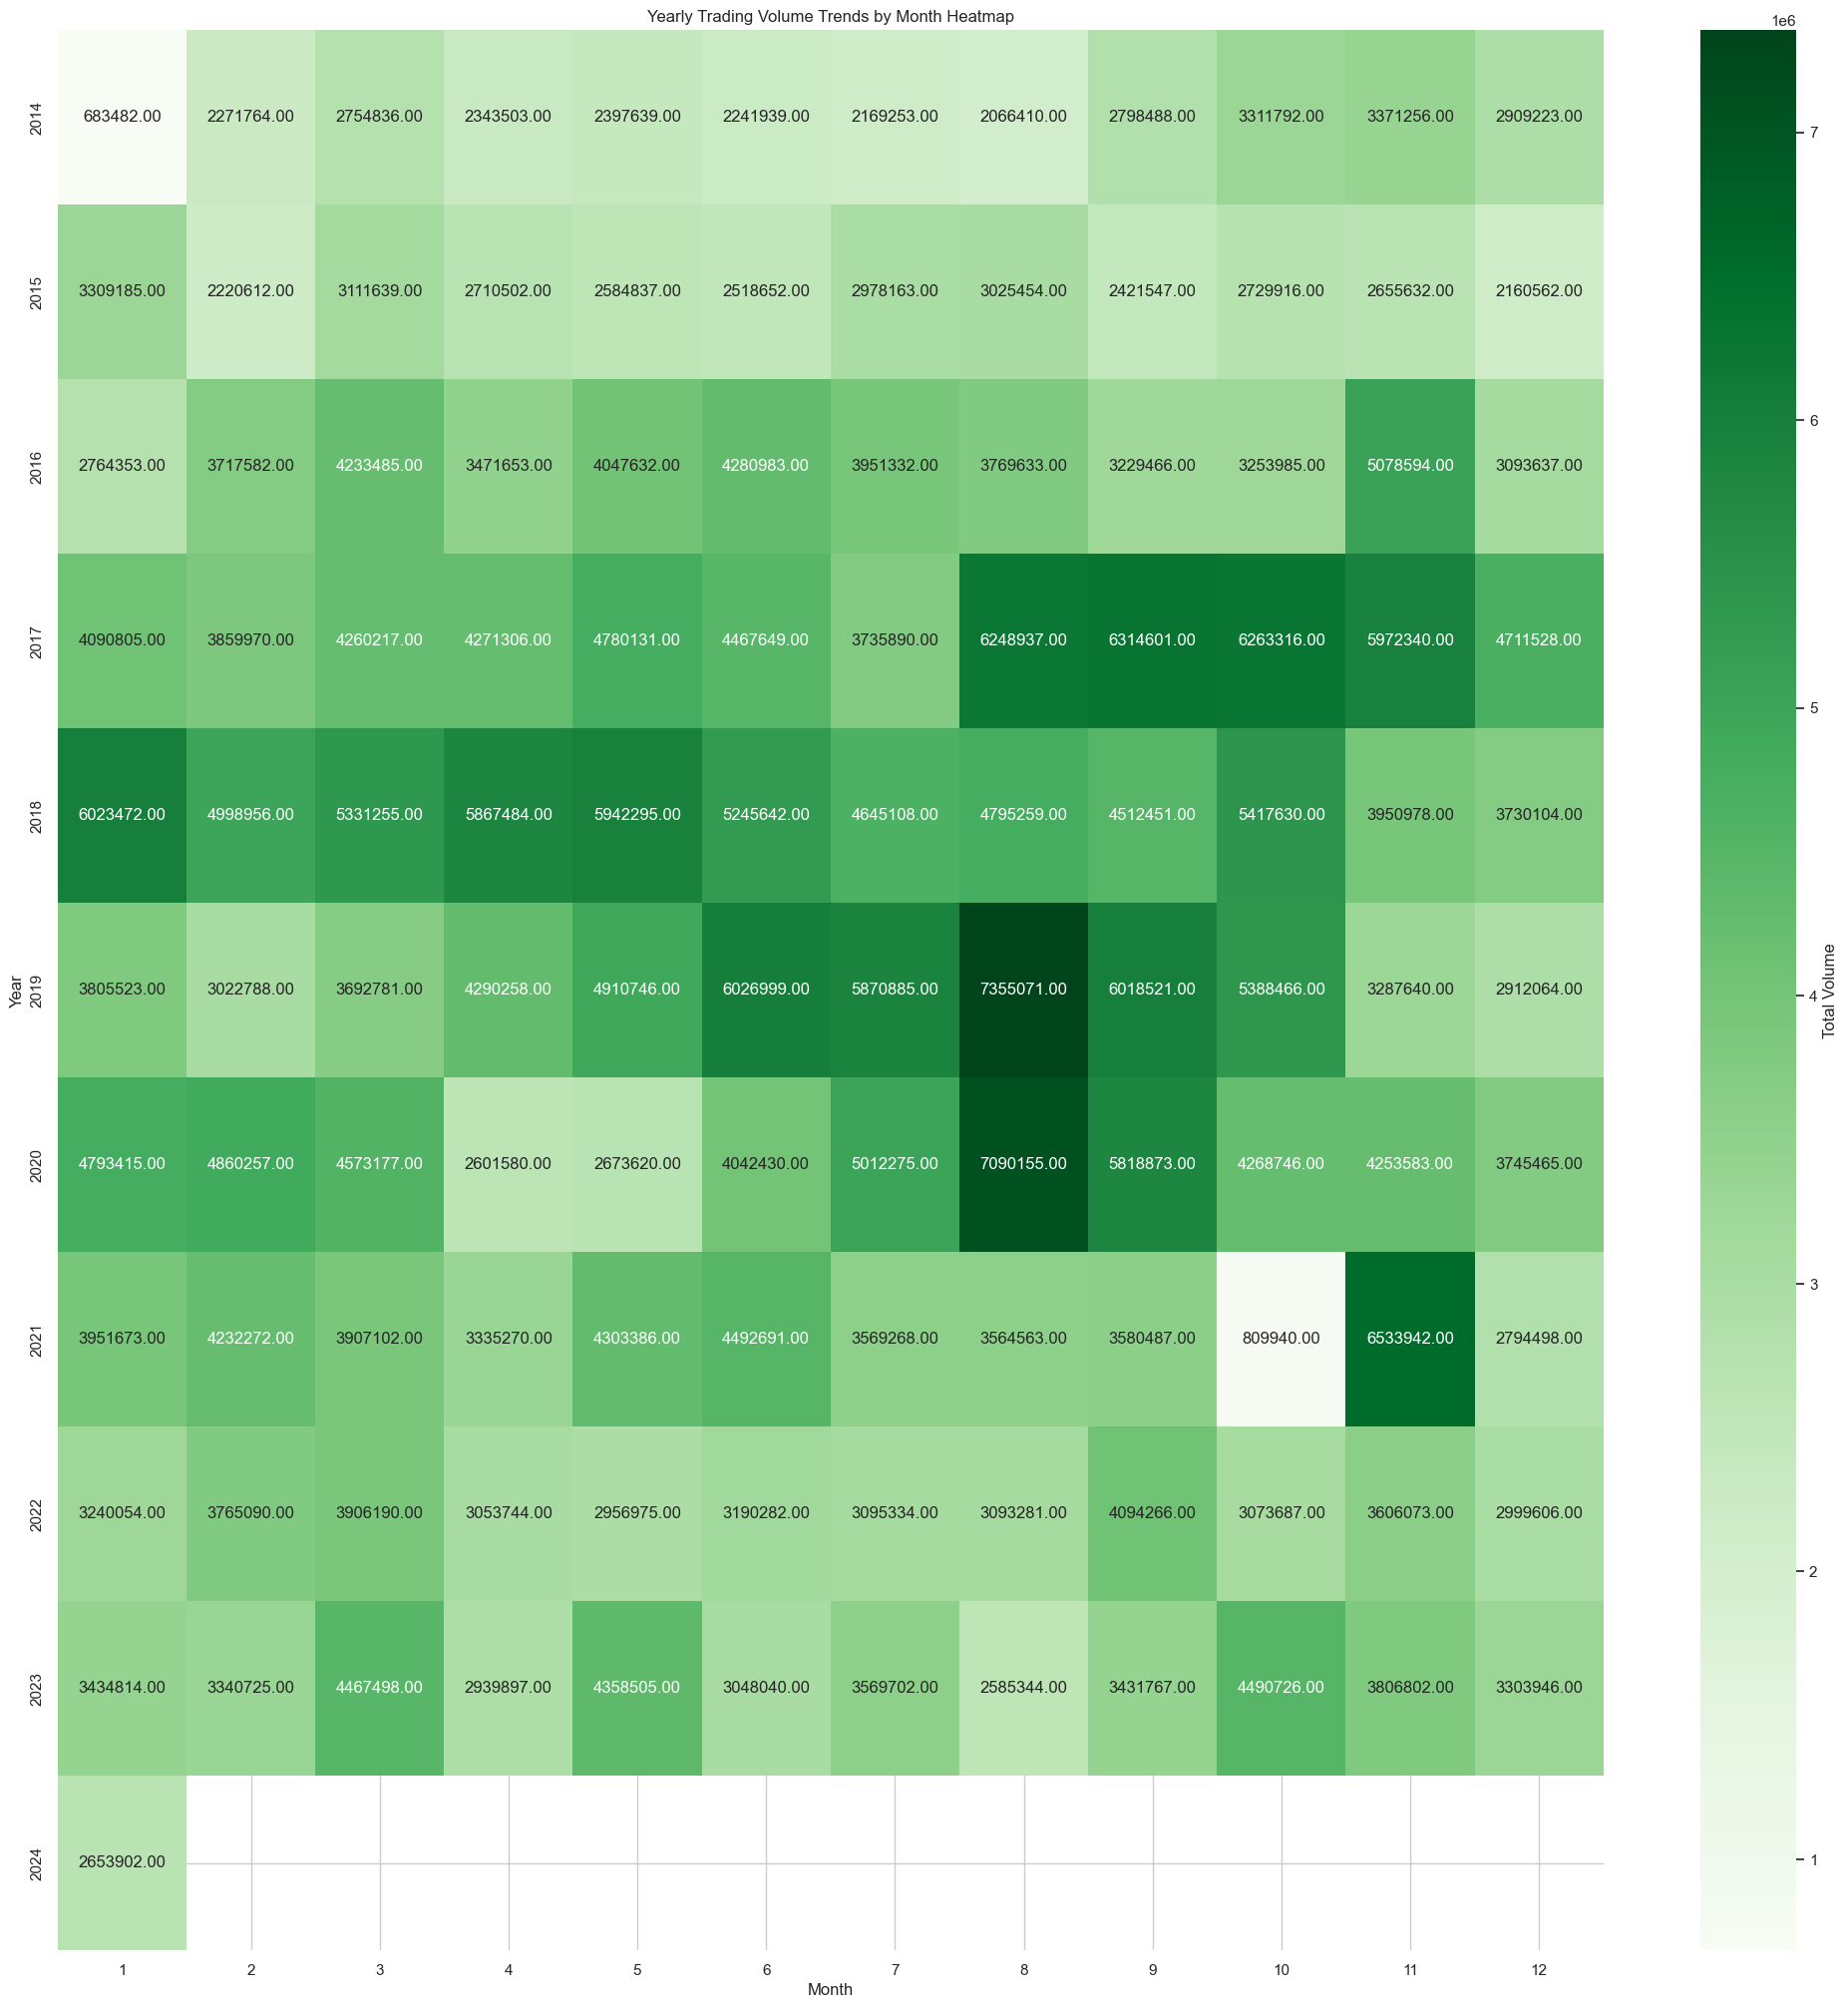

In [42]:
# Creating a pivot table for yearly trading volume trends by month
yearly_volume_trends = data.pivot_table(index='Year', columns='Month', values='Volume', aggfunc='sum')

# Creating a heatmap of yearly trading volume trends by month
plt.figure(figsize=(25, 25))
sns.heatmap(yearly_volume_trends, cmap='Greens', annot=True, fmt=".2f", cbar_kws={'label': 'Total Volume'})
plt.title('Yearly Trading Volume Trends by Month Heatmap')
plt.show()
